# Hypothesis
In Southeast Asia, countries with weaker vital registration systems and measurement capacity are likely under-capturing maternal mortality, creating a gap between observed maternal deaths and improved estimates after modeling and adjustment.

#### Hypothesis #1: Clustering Methods Comparison

"K-means partitions data into distinct clusters while GMM models probabilistic soft clusters, each revealing different aspects of maternal mortality reporting patterns."

#### Hypothesis #2: Dimensionality Reduction Comparison

"PCA reduces dimensions by maximizing variance, while ICA separates independent sources, providing complementary insights into maternal mortality reporting patterns."

#### Hypothesis #3: Cluster Stability under Random Projections

"After applying randomized projections to reduce dimensionality, K-means will recover a similar cluster structure as in the original feature space."

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("main_data.csv", header =0)
df.head()

,Unnamed: 0,iso_alpha_3_code,year_start,year_end,year_mid,env_total,env_mat,truemat_vr,truemat,truemat_vr_unscaled,...,final_mmr_before_crisis,env_total_calculated_from_lifetables,live_births_calculated_from_birthsdata,CI.low.postmod,CI.up.postmod,multiplier,pm.adj.postmod,mmr.CI.up.postmod,mmr.CI.low.postmod,mmr.adj.postmod
0,1,AFG,2003.650,2010.650,2007.150,NaN,NaN,NaN,NaN,NaN,...,0.007595,150658.80,7829250.0,0.238582,0.559530,NaN,0.365374,0.010767,0.004591,0.007031
1,2,AFG,2009.146,2016.146,2012.646,NaN,NaN,NaN,NaN,NaN,...,0.011984,152224.56,8518302.0,0.466410,0.826282,NaN,0.620798,0.014766,0.008335,0.011094
2,3,AFG,1999.000,2002.000,2000.500,NaN,NaN,NaN,NaN,NaN,...,NaN,62447.00,2933000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ALB,1987.000,1988.000,1987.500,NaN,NaN,NaN,NaN,NaN,...,0.000337,686.00,84000.0,0.026984,0.107937,1.501418,0.061963,0.000881,0.000220,0.000506
4,5,ALB,1988.000,1989.000,1988.500,NaN,NaN,NaN,NaN,NaN,...,0.000372,671.00,83000.0,0.031199,0.119869,1.500774,0.069001,0.000969,0.000252,0.000558


In [ ]:
unique_codes = df['iso_alpha_3_code'].unique()
print(unique_codes)

['AFG' 'ALB' 'DZA' 'AGO' 'ATG' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BHS' 'BHR'
 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'BRN'
 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CAF' 'TCD' 'CHL' 'CHN' 'COL'
 'COM' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CYP' 'CZE' 'PRK' 'COD' 'DNK' 'DOM'
 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'ETH' 'FJI' 'FIN' 'FRA' 'GAB' 'GMB'
 'GEO' 'DEU' 'GHA' 'GRC' 'GRD' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HUN'
 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ'
 'KEN' 'KIR' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LTU' 'LUX'
 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MRT' 'MUS' 'MEX' 'MNG' 'MNE' 'MAR'
 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NZL' 'NIC' 'NER' 'NGA' 'NOR' 'PSE' 'OMN'
 'PAK' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT' 'PRI' 'QAT' 'KOR' 'MDA'
 'ROU' 'RUS' 'RWA' 'LCA' 'STP' 'SAU' 'SEN' 'SRB' 'SYC' 'SLE' 'SGP' 'SVK'
 'SVN' 'SLB' 'ZAF' 'SSD' 'ESP' 'LKA' 'VCT' 'SDN' 'SUR' 'SWZ' 'SWE' 'CHE'
 'SYR' 'TJK' 'TZA' 'MKD' 'THA' 'TLS' 'TGO' 'TTO' 'T

In [ ]:
# Only include countries in SEA
SEA_ISO3 = ['BRN', 'KHM', 'IDN', 'LAO', 'MYS', 'MMR', 'PHL', 'SGP', 'THA', 'TLS', 'VNM']
df_sea = df[df['iso_alpha_3_code'].isin(SEA_ISO3)]
df_sea.head()

,Unnamed: 0,iso_alpha_3_code,year_start,year_end,year_mid,env_total,env_mat,truemat_vr,truemat,truemat_vr_unscaled,...,final_mmr_before_crisis,env_total_calculated_from_lifetables,live_births_calculated_from_birthsdata,CI.low.postmod,CI.up.postmod,multiplier,pm.adj.postmod,mmr.CI.up.postmod,mmr.CI.low.postmod,mmr.adj.postmod
542,543,BRN,2001.0,2002.0,2001.5,NaN,NaN,NaN,NaN,NaN,...,0.000773,119.0,6000.0,0.0,0.233766,1.491385,0.058106,0.004636,0.0,0.001152
543,544,BRN,2002.0,2003.0,2002.5,NaN,NaN,NaN,NaN,NaN,...,0.000818,121.0,6000.0,0.0,0.243243,1.491386,0.060462,0.004905,0.0,0.001219
544,545,BRN,2003.0,2004.0,2003.5,NaN,NaN,NaN,NaN,NaN,...,0.000765,124.0,6000.0,0.0,0.222222,1.488443,0.055128,0.004593,0.0,0.001139
545,546,BRN,2004.0,2005.0,2004.5,NaN,NaN,NaN,NaN,NaN,...,0.000229,125.0,6000.0,0.0,0.120879,1.488269,0.016355,0.002518,0.0,0.000341
546,547,BRN,2005.0,2006.0,2005.5,NaN,NaN,NaN,NaN,NaN,...,0.000233,126.0,6000.0,0.0,0.122222,1.487991,0.016533,0.002567,0.0,0.000347


In [ ]:
df_sea.columns.tolist()

['Unnamed: 0',
 'iso_alpha_3_code',
 'year_start',
 'year_end',
 'year_mid',
 'env_total',
 'env_mat',
 'truemat_vr',
 'truemat',
 'truemat_vr_unscaled',
 'truemat_unscaled',
 'tp',
 'tn',
 'fp',
 'fn',
 'up',
 'un',
 'include',
 'include_bmis_global',
 'include_bmis',
 'include_bmat_reason',
 'include_bmis_reason',
 'incomplete_vr_multiplier',
 'check_outside_of_vr',
 'study_period_coverage',
 'citation_short',
 'citation_long',
 'completeness_inq',
 'complete_vr',
 'obs_matdeaths',
 'final_env',
 'final_pm',
 'obs_selogpm',
 'type',
 'definition',
 'mat_vr',
 'nonmat_vr',
 'tot',
 'tot_vr',
 'rho_ref',
 'mat_vr_ref',
 'tot_vr_ref',
 'tot_ref',
 'dmname',
 'iso_country_name',
 'who_code_2',
 'obs_matdeaths_incl_late',
 'obs_matdeaths_late',
 'obs_env',
 'ill_defined_death_proportion',
 'ill_defined_death_proportion2',
 'obs_ill',
 'exclude_reason',
 'icd_utilized',
 'icd',
 'env_total_who_estimated',
 'include_hasvrdata',
 'rho_period',
 'rho_period_max',
 'rho_period_min',
 'vrenv_vr

In [ ]:
# Drop columns with > 150 NAs to avoid distorting results
nan_counts = df_sea.isnull().sum()
cols_to_drop = nan_counts[nan_counts > 150].index
cols_to_drop

Index(['env_total', 'env_mat', 'truemat_vr', 'truemat', 'truemat_vr_unscaled',
       'truemat_unscaled', 'tp', 'tn', 'fp', 'fn', 'up', 'un',
       'include_bmis_global', 'include_bmis', 'include_bmat_reason',
       'include_bmis_reason', 'incomplete_vr_multiplier',
       'check_outside_of_vr', 'study_period_coverage', 'citation_long',
       'completeness_inq', 'complete_vr', 'obs_selogpm', 'mat_vr', 'nonmat_vr',
       'tot', 'tot_vr', 'rho_ref', 'mat_vr_ref', 'tot_vr_ref', 'tot_ref',
       'dmname', 'exclude_reason', 'name', 'id',
       'ori_vr_data_from_paho_update', 'env_total_imputed',
       'live_births_imputed', 'env_pregrelated', 'mmr', 'live_births', 'refID',
       'mdeathspluslate', 'ramos...yes.1.', 'comments', 'env_total_lifetables',
       'live_births_lifetables'],
      dtype='object')

In [ ]:
# Display the shape of the new DataFrame to see how many columns were dropped
df_sea_dropped = df_sea.drop(columns=cols_to_drop)
print("Original shape:", df_sea.shape)
print("Shape after dropping columns with > 150 NaNs:", df_sea_dropped.shape)

Original shape: (186, 112)
Shape after dropping columns with > 150 NaNs: (186, 65)


In [ ]:
df_sea_dropped.columns.tolist()

['Unnamed: 0',
 'iso_alpha_3_code',
 'year_start',
 'year_end',
 'year_mid',
 'include',
 'citation_short',
 'obs_matdeaths',
 'final_env',
 'final_pm',
 'type',
 'definition',
 'iso_country_name',
 'who_code_2',
 'obs_matdeaths_incl_late',
 'obs_matdeaths_late',
 'obs_env',
 'ill_defined_death_proportion',
 'ill_defined_death_proportion2',
 'obs_ill',
 'icd_utilized',
 'icd',
 'env_total_who_estimated',
 'include_hasvrdata',
 'rho_period',
 'rho_period_max',
 'rho_period_min',
 'vrenv_vradj',
 'ytot_bmis',
 'rho_bmis',
 'vrenv_bmat',
 'ytot_bmat',
 'rho_bmat',
 'rho_intermediate',
 'usability_percentage',
 'include_reason',
 'special_case',
 't',
 'sens',
 'var_sens',
 'sens_sq',
 'oneminsens_sq',
 'lower_sens',
 'upper_sens',
 'spec',
 'var_spec',
 'spec_sq',
 'oneminspec_sq',
 'lower_spec',
 'upper_spec',
 'rho_sesp',
 'cov_sesp',
 'cov.t',
 'final_mmr',
 'final_pm_before_crisis',
 'final_mmr_before_crisis',
 'env_total_calculated_from_lifetables',
 'live_births_calculated_from_birt

In [ ]:
# Year start, year end, year mid are essentially the same
df_sea_dropped = df_sea_dropped.drop(columns=['year_end', 'year_mid'])
print("year change: ", df_sea_dropped.shape)

# Do not need the full countries name as we already have iso 3 code
df_sea_dropped = df_sea_dropped.drop(columns=['iso_country_name'])
print("country change: ", df_sea_dropped.shape)

# Do not need the citation sources
df_sea_dropped = df_sea_dropped.drop(columns=['citation_short'])
print("citation change: ", df_sea_dropped.shape)

# Do not need to know the icd version used to code the death
df_sea_dropped = df_sea_dropped.drop(columns=['icd', 'icd_utilized'])
print("icd change: ", df_sea_dropped.shape)

year change:  (186, 63)
country change:  (186, 62)
citation change:  (186, 61)
icd change:  (186, 59)


<Axes: >

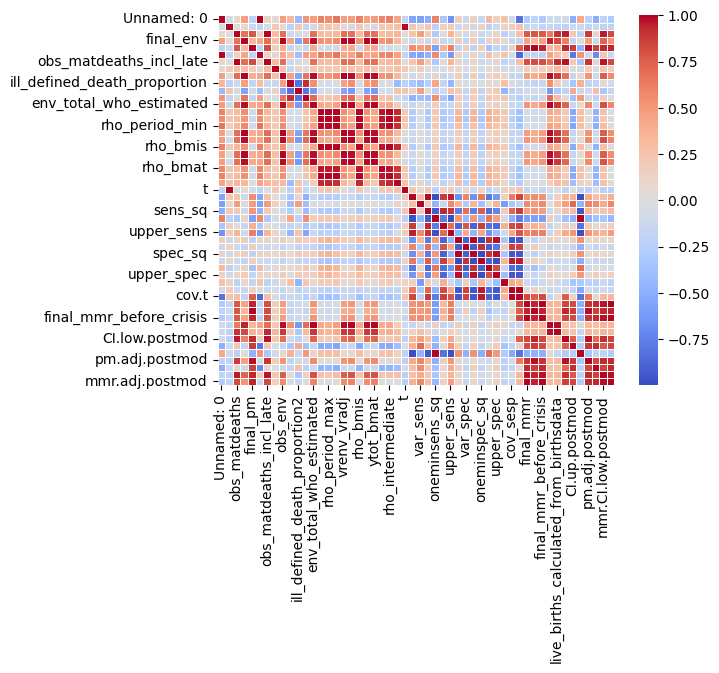

In [ ]:
# Keep only numeric columns
numeric_df = df_sea_dropped.select_dtypes(include='number')
sb.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white')

In [ ]:
# Rho period is estimated by the model and hence isnt part of the data, can be dropped
df_sea_dropped = df_sea_dropped.drop(columns=['rho_bmat', 'rho_bmis'])
print("rho change: ", df_sea_dropped.shape)

rho change:  (186, 57)


In [ ]:
df_sea_dropped.columns.tolist()

['Unnamed: 0',
 'iso_alpha_3_code',
 'year_start',
 'include',
 'obs_matdeaths',
 'final_env',
 'final_pm',
 'type',
 'definition',
 'who_code_2',
 'obs_matdeaths_incl_late',
 'obs_matdeaths_late',
 'obs_env',
 'ill_defined_death_proportion',
 'ill_defined_death_proportion2',
 'obs_ill',
 'env_total_who_estimated',
 'include_hasvrdata',
 'rho_period',
 'rho_period_max',
 'rho_period_min',
 'vrenv_vradj',
 'ytot_bmis',
 'vrenv_bmat',
 'ytot_bmat',
 'rho_intermediate',
 'usability_percentage',
 'include_reason',
 'special_case',
 't',
 'sens',
 'var_sens',
 'sens_sq',
 'oneminsens_sq',
 'lower_sens',
 'upper_sens',
 'spec',
 'var_spec',
 'spec_sq',
 'oneminspec_sq',
 'lower_spec',
 'upper_spec',
 'rho_sesp',
 'cov_sesp',
 'cov.t',
 'final_mmr',
 'final_pm_before_crisis',
 'final_mmr_before_crisis',
 'env_total_calculated_from_lifetables',
 'live_births_calculated_from_birthsdata',
 'CI.low.postmod',
 'CI.up.postmod',
 'multiplier',
 'pm.adj.postmod',
 'mmr.CI.up.postmod',
 'mmr.CI.low.po

In [ ]:
# Deleting other duplicate columns as well
columns = ['ytot_bmat', 'vrenv_bmat', 'ytot_bmis', 'final_pm_before_crisis', 'final_mmr_before_crisis', 'rho_period', 'rho_period_max', 'rho_period_min', 'include_hasvrdata', 'vrenv_vradj']
df_sea_dropped = df_sea_dropped.drop(columns=columns)
print("duplicate columns change: ", df_sea_dropped.shape)

duplicate columns change:  (186, 47)


In [ ]:
df_sea_dropped.columns.tolist()

['Unnamed: 0',
 'iso_alpha_3_code',
 'year_start',
 'include',
 'obs_matdeaths',
 'final_env',
 'final_pm',
 'type',
 'definition',
 'who_code_2',
 'obs_matdeaths_incl_late',
 'obs_matdeaths_late',
 'obs_env',
 'ill_defined_death_proportion',
 'ill_defined_death_proportion2',
 'obs_ill',
 'env_total_who_estimated',
 'rho_intermediate',
 'usability_percentage',
 'include_reason',
 'special_case',
 't',
 'sens',
 'var_sens',
 'sens_sq',
 'oneminsens_sq',
 'lower_sens',
 'upper_sens',
 'spec',
 'var_spec',
 'spec_sq',
 'oneminspec_sq',
 'lower_spec',
 'upper_spec',
 'rho_sesp',
 'cov_sesp',
 'cov.t',
 'final_mmr',
 'env_total_calculated_from_lifetables',
 'live_births_calculated_from_birthsdata',
 'CI.low.postmod',
 'CI.up.postmod',
 'multiplier',
 'pm.adj.postmod',
 'mmr.CI.up.postmod',
 'mmr.CI.low.postmod',
 'mmr.adj.postmod']

<Axes: >

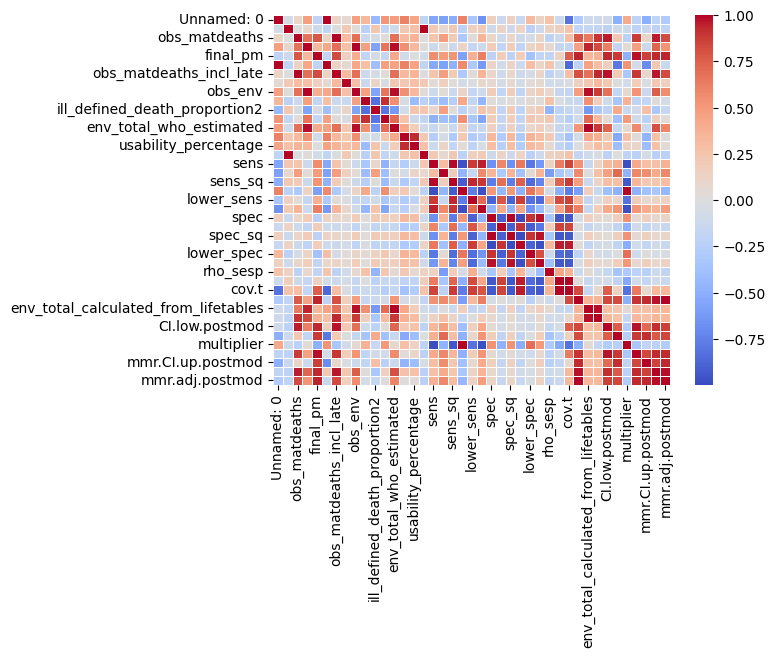

In [ ]:
numeric_df = df_sea_dropped.select_dtypes(include='number')
sb.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white')

In [ ]:
# Identify and remove non-numeric columns
numeric_df_cleaned = df_sea_dropped.select_dtypes(include=np.number)

# Remove rows with missing values
numeric_df_cleaned = numeric_df_cleaned.dropna()

print("Shape after removing non-numeric columns and rows with NaNs:", numeric_df_cleaned.shape)

Shape after removing non-numeric columns and rows with NaNs: (35, 41)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df_cleaned)

print("Shape after scaling:", scaled_data.shape)

Shape after scaling: (35, 41)


# K-Means method



## Determing the number of cluster for K-means

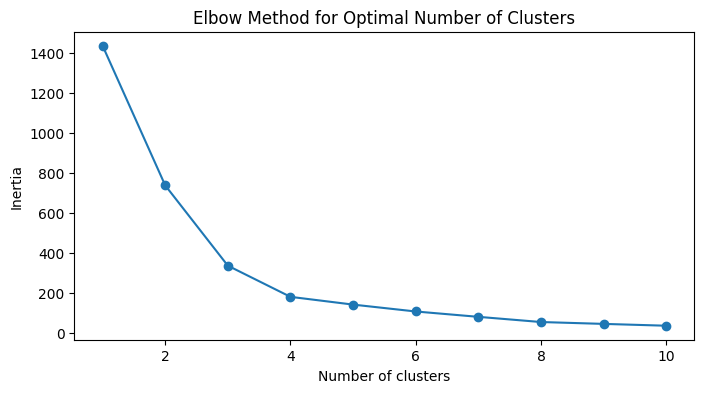

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Based on the elbow method plot, we choose an optimal number of clusters (n=3 in this case) and proceed with the K-Means clustering in the next step.

In [ ]:
# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster assignments to the cleaned numeric DataFrame
numeric_df_cleaned['cluster'] = clusters

display(numeric_df_cleaned.head())

,Unnamed: 0,year_start,obs_matdeaths,final_env,final_pm,who_code_2,obs_matdeaths_incl_late,obs_matdeaths_late,obs_env,ill_defined_death_proportion,...,env_total_calculated_from_lifetables,live_births_calculated_from_birthsdata,CI.low.postmod,CI.up.postmod,multiplier,pm.adj.postmod,mmr.CI.up.postmod,mmr.CI.low.postmod,mmr.adj.postmod,cluster
2172,2173,2003.0,137.0,4709.0,0.029093,3236.0,137.0,0.0,4709.0,0.065619,...,6921.0,476000.0,0.017838,0.036526,0.909141,0.026450,0.000531,0.000259,0.000385,2
2173,2174,2004.0,128.0,4748.0,0.026959,3236.0,128.0,0.0,4748.0,0.070345,...,6969.0,463000.0,0.016217,0.034120,0.904822,0.024393,0.000514,0.000244,0.000367,2
2174,2175,2005.0,127.0,4905.0,0.025892,3236.0,127.0,0.0,4905.0,0.071356,...,6934.0,457000.0,0.015494,0.032620,0.900591,0.023318,0.000495,0.000235,0.000354,2
2175,2176,2009.0,134.0,4786.0,0.027998,3236.0,134.0,0.0,4786.0,0.032595,...,6954.0,488000.0,0.016715,0.034893,0.896499,0.025100,0.000497,0.000238,0.000358,2
2176,2177,2010.0,128.0,4938.0,0.025921,3236.0,128.0,0.0,4938.0,0.039692,...,6785.0,487000.0,0.014783,0.031794,0.872510,0.022617,0.000443,0.000206,0.000315,2


Number of clusters: 3

Points per cluster:
cluster
0     9
1    17
2     9
Name: count, dtype: int64


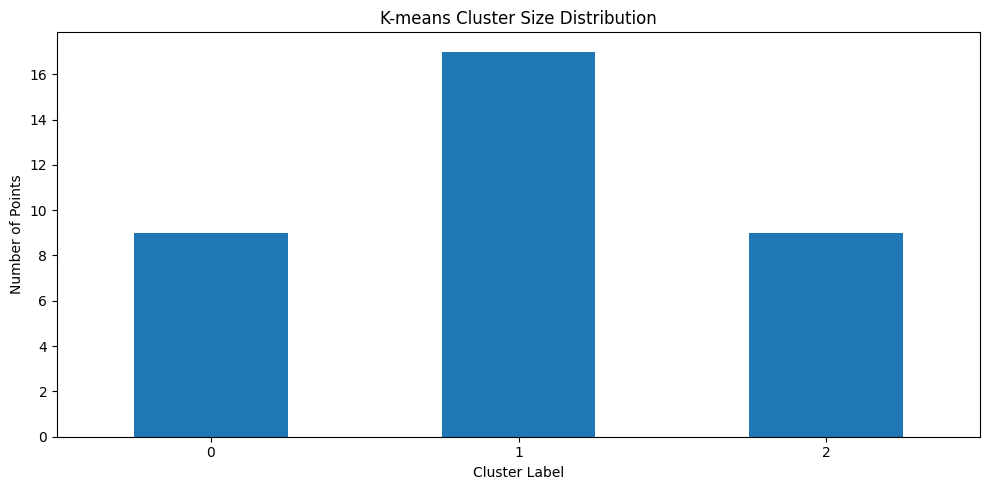

In [ ]:
# Cluster size analysis for K-means on original data
kmeans_cluster_counts = numeric_df_cleaned['cluster'].value_counts().sort_index()

print("Number of clusters:", kmeans_cluster_counts.shape[0])
print("\nPoints per cluster:")
print(kmeans_cluster_counts)

# Plot distribution as a histogram of cluster sizes
plt.figure(figsize=(10, 5))
kmeans_cluster_counts.plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('K-means Cluster Size Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualising K-means clustering

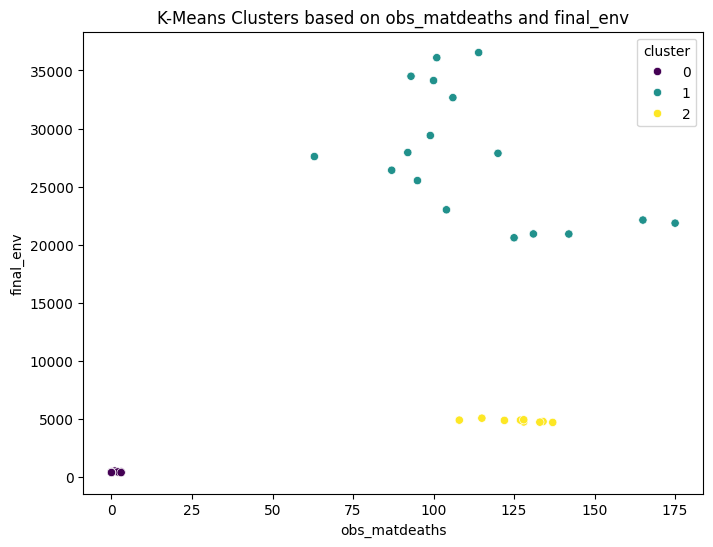

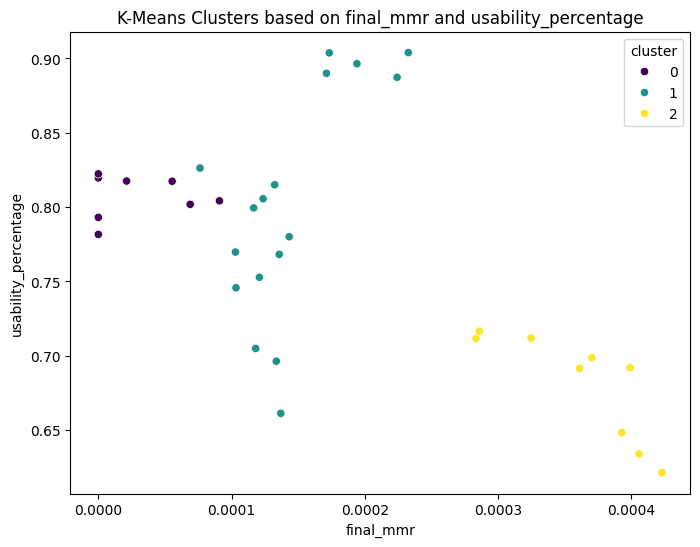

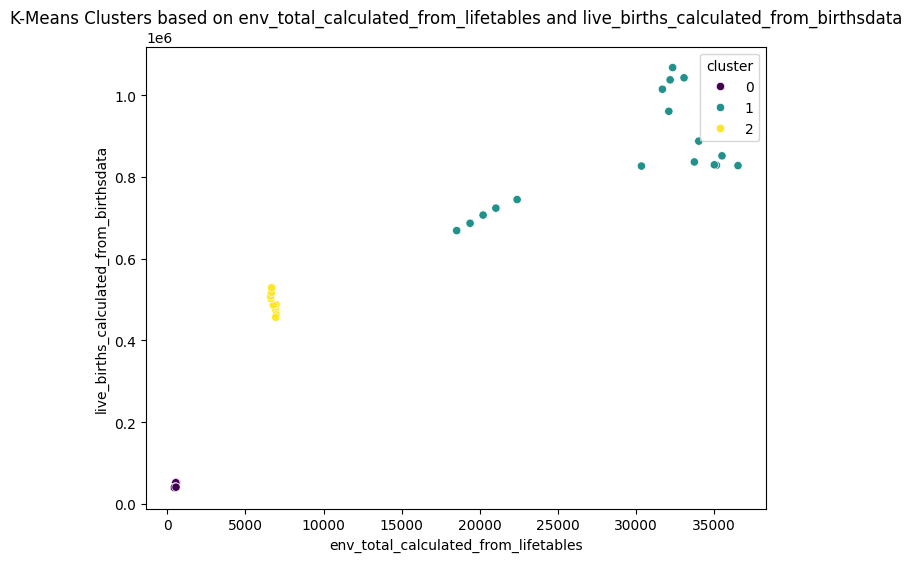

In [ ]:
# Visualize pairs of features, colored by cluster
# Choosing a few potentially interesting pairs based on the data context
feature_pairs = [
    ('obs_matdeaths', 'final_env'),
    ('final_mmr', 'usability_percentage'),
    ('env_total_calculated_from_lifetables', 'live_births_calculated_from_birthsdata')
]

for x_col, y_col in feature_pairs:
    plt.figure(figsize=(8, 6))
    sb.scatterplot(data=numeric_df_cleaned, x=x_col, y=y_col, hue='cluster', palette='viridis', legend='full')
    plt.title(f'K-Means Clusters based on {x_col} and {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

### First Scatter Plot
First scatter plot shows the relation between "obs_matdeaths" - observed maternal deaths to "final_emv" - final estimated total deaths of women of reproductive age
As we can see, there are 3 clusters
There are three clusters:
**Cluster 0** (purple): Very low observed maternal deaths and very low total death envelope. These may represent countries with strong vital registration and low maternal mortality.

**Cluster 2** (yellow): Moderate to high observed maternal deaths but relatively low total death envelope. These could be countries with higher reported maternal deaths but not a proportionally high total death envelope.

**Cluster 1** (green/teal): Moderate to high observed maternal deaths and very high total death envelope. These countries may have both high maternal deaths and high overall mortality.

### Second scatter plot
Shows the relation between "final_mmr" - final estimated maternal mortality ratio (maternal deaths per 100,000 live births) and "usability_percentage" - measure of data quality

**Negative Correlation**: There appears to be a negative relationship - as maternal mortality ratio increases, data usability tends to decrease

**Cluster 0** (purple): Low MMR, high usability (around 0.80) - likely countries with strong health systems and good data quality

**Cluster 1** (teal): Moderate MMR, varying usability (0.65-0.90)

**Cluster 2** (yellow): High MMR, lower usability (0.65-0.70) - suggesting countries with weaker health systems and poorer data quality


### Third scatter plot
Represents the relation between "env_total_calculated_from_lifetable" - estimated total deaths of women (15-49) using life tables and mortality models and "live_births_calculated_from_birthsdata" - estimated total number of live births from national or modeled data

**Positive Correlation**
As estimated deaths increase, estimated births tend to increase, which suggests larger populations have both more deaths and births

# Guassian Method

## Determining the no. of components for gaussian

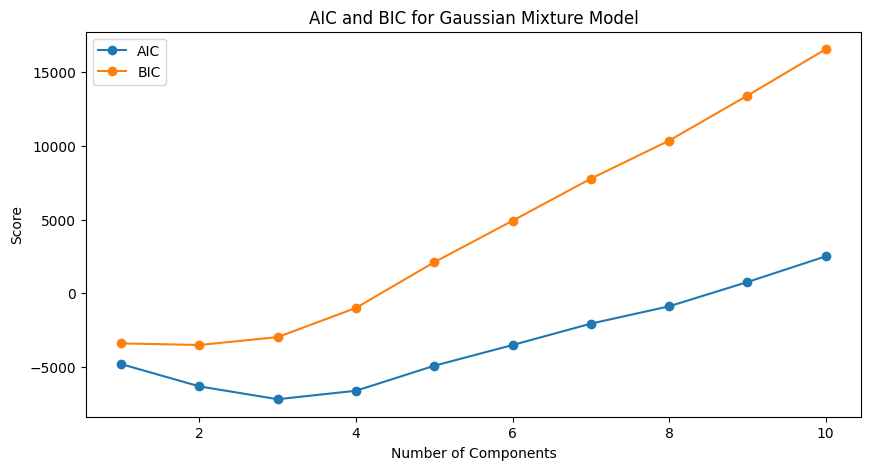

In [ ]:
from sklearn.mixture import GaussianMixture

# Determine the optimal number of components using AIC and BIC
n_components_range = range(1, 11)
aic = []
bic = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(scaled_data)
    aic.append(gmm.aic(scaled_data))
    bic.append(gmm.bic(scaled_data))

# Plot AIC and BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC for Gaussian Mixture Model')
plt.legend()
plt.show()


**Blue Line (AIC - Akaike Information Criterion)**:
Decreases until about 3 components then starts to increase after that. For AIC, lower values are better

**Orange Line (BIC - Bayesian Information Criterion)**:
BIC is a more conservative metric than AIC. Has lowest value at 2 component before steadily increases.

Hence we choose 2 components as BIC shows clear minimum at 2 and BIC penalises complexity more heavily. Additionally more components would risk overfitting.

In [ ]:
# Apply Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(scaled_data)
gmm_clusters = gmm.predict(scaled_data)

# Add the GMM cluster assignments to the cleaned numeric DataFrame
numeric_df_cleaned['gmm_cluster'] = gmm_clusters

display(numeric_df_cleaned.head())

,Unnamed: 0,year_start,obs_matdeaths,final_env,final_pm,who_code_2,obs_matdeaths_incl_late,obs_matdeaths_late,obs_env,ill_defined_death_proportion,...,live_births_calculated_from_birthsdata,CI.low.postmod,CI.up.postmod,multiplier,pm.adj.postmod,mmr.CI.up.postmod,mmr.CI.low.postmod,mmr.adj.postmod,cluster,gmm_cluster
2172,2173,2003.0,137.0,4709.0,0.029093,3236.0,137.0,0.0,4709.0,0.065619,...,476000.0,0.017838,0.036526,0.909141,0.026450,0.000531,0.000259,0.000385,2,1
2173,2174,2004.0,128.0,4748.0,0.026959,3236.0,128.0,0.0,4748.0,0.070345,...,463000.0,0.016217,0.034120,0.904822,0.024393,0.000514,0.000244,0.000367,2,1
2174,2175,2005.0,127.0,4905.0,0.025892,3236.0,127.0,0.0,4905.0,0.071356,...,457000.0,0.015494,0.032620,0.900591,0.023318,0.000495,0.000235,0.000354,2,1
2175,2176,2009.0,134.0,4786.0,0.027998,3236.0,134.0,0.0,4786.0,0.032595,...,488000.0,0.016715,0.034893,0.896499,0.025100,0.000497,0.000238,0.000358,2,1
2176,2177,2010.0,128.0,4938.0,0.025921,3236.0,128.0,0.0,4938.0,0.039692,...,487000.0,0.014783,0.031794,0.872510,0.022617,0.000443,0.000206,0.000315,2,1


Number of clusters (components): 2

Points per cluster:
gmm_cluster
0     9
1    26
Name: count, dtype: int64


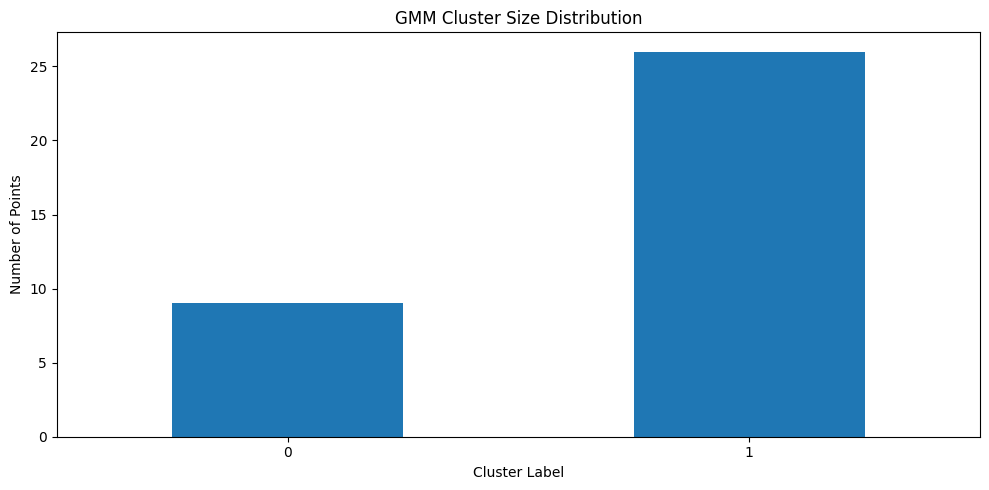

In [ ]:
# Cluster size analysis for GMM on original data

gmm_cluster_counts = numeric_df_cleaned['gmm_cluster'].value_counts().sort_index()

print("Number of clusters (components):", gmm_cluster_counts.shape[0])
print("\nPoints per cluster:")
print(gmm_cluster_counts)

plt.figure(figsize=(10, 5))
gmm_cluster_counts.plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('GMM Cluster Size Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualsing GMM clusters

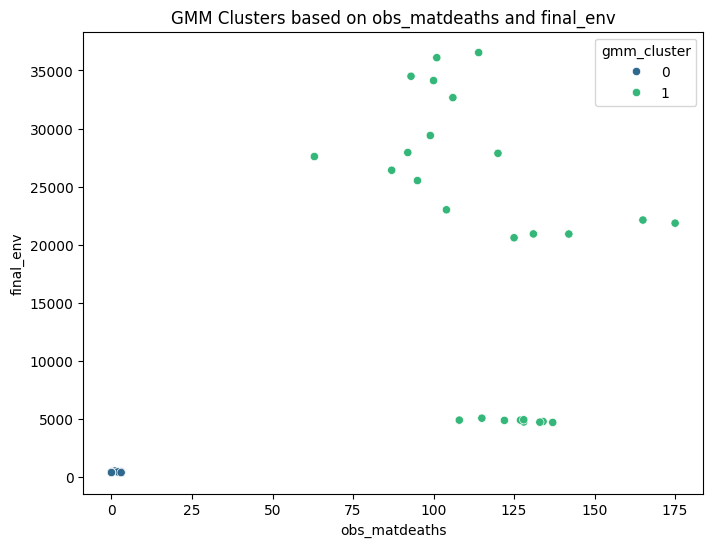

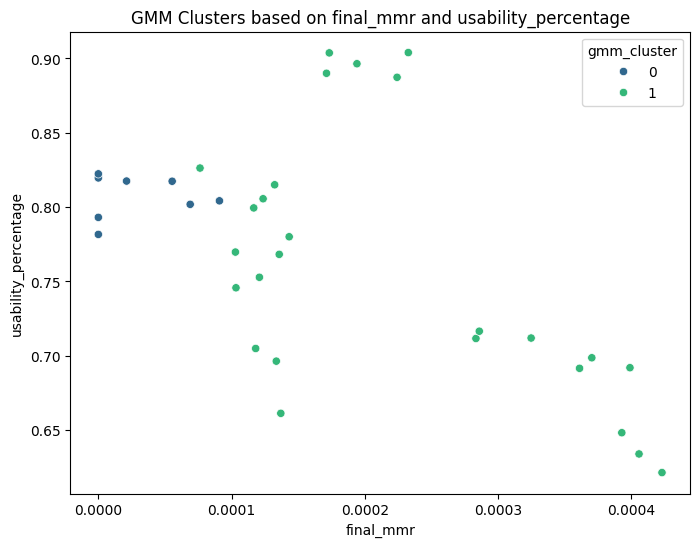

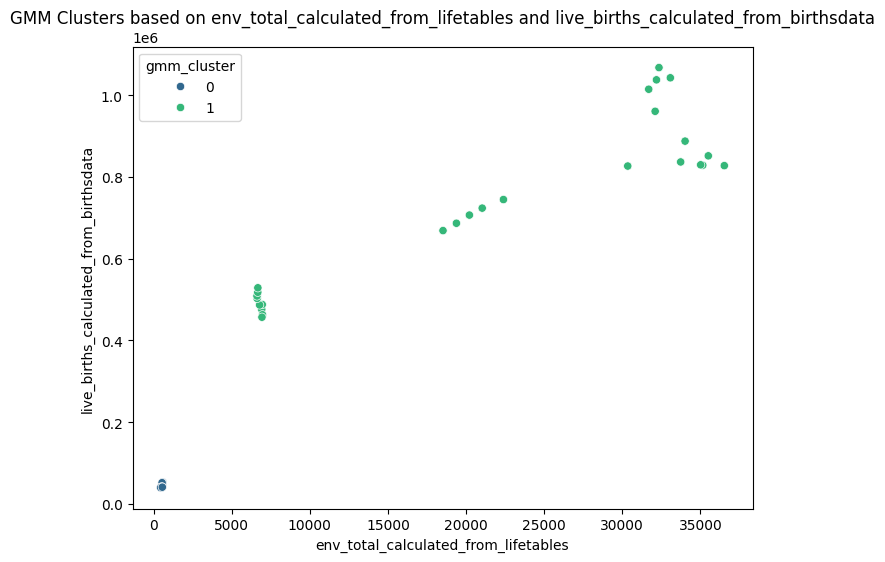

In [ ]:
# Visualize pairs of features, colored by GMM cluster
feature_pairs = [
    ('obs_matdeaths', 'final_env'),
    ('final_mmr', 'usability_percentage'),
    ('env_total_calculated_from_lifetables', 'live_births_calculated_from_birthsdata')
]

for x_col, y_col in feature_pairs:
    plt.figure(figsize=(8, 6))
    sb.scatterplot(data=numeric_df_cleaned, x=x_col, y=y_col, hue='gmm_cluster', palette='viridis', legend='full')
    plt.title(f'GMM Clusters based on {x_col} and {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

## **In general:**
K-Means creates more distinct boundaries between 3 cluster while GMM combines the low and moderate death cases into a single cluster

### Plot 1
#### Comparing observed maternal death vs final estimated total deaths
GMM's 2-cluster solution suggests a simpler split between countries with well-functioning health systems (low deaths/envelope) and challenged health systems (high deaths/envelope)

While K-Means' 3-cluster solution provides more granular grouping, potentially identifying countries in transition

### Plot 2
#### Comparing Total deaths vs Live births
GMM focuses on the fundamental split between well-functioning and challenged systems shown by its gradual transition and overlapping regions

While K-Means seemingly better identifies transitional states between good and poor systems as it shows sharpers boundaries between clusters

### Plot 3
#### Comparing MMR vs Usabilitiy percentage graph
GMM emphasizes the fundamental divide between developed and developing healthcare systems as seemn from the plot where there is a binary split between large population and smaller ones

While K-Means better shows the stepwise progression in healthcare system development as there are more granular grouping reflecting small, medium and large populations

However, a more qualitative analysis will be done below.

Next steps:
- Analyze the characteristics of each GMM cluster by examining the mean values of features within each cluster.
- Compare the cluster assignments from K-Means and GMM for individual data points.


# Analyzing characteristics of K-mean and GMM graphs

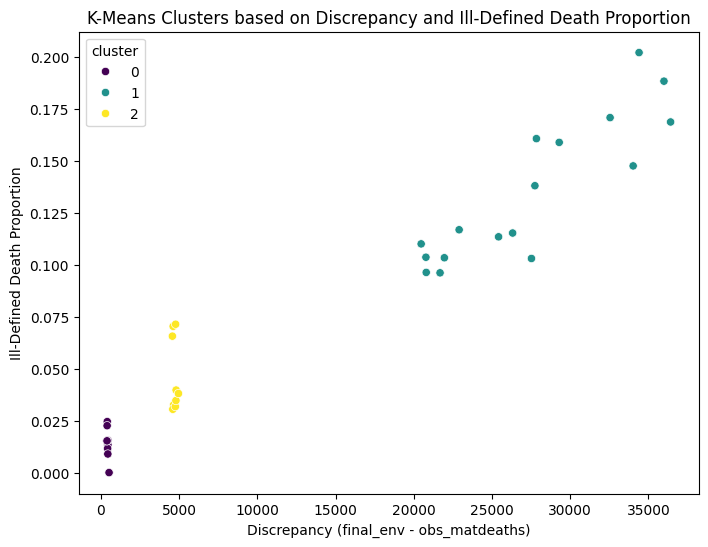

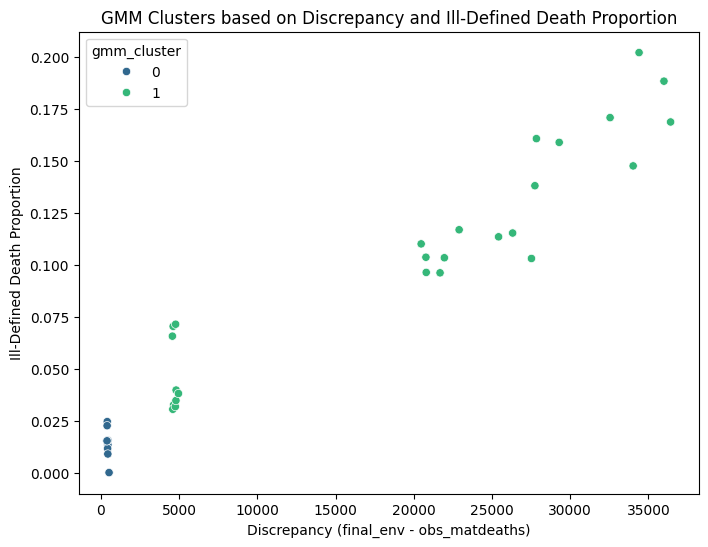

In [ ]:
# Calculate the discrepancy between final_env and obs_matdeaths
numeric_df_cleaned['discrepancy'] = numeric_df_cleaned['final_env'] - numeric_df_cleaned['obs_matdeaths']

# Visualize K-Means clusters based on discrepancy and ill_defined_death_proportion
plt.figure(figsize=(8, 6))
sb.scatterplot(data=numeric_df_cleaned, x='discrepancy', y='ill_defined_death_proportion', hue='cluster', palette='viridis', legend='full')
plt.title('K-Means Clusters based on Discrepancy and Ill-Defined Death Proportion')
plt.xlabel('Discrepancy (final_env - obs_matdeaths)')
plt.ylabel('Ill-Defined Death Proportion')
plt.show()

# Visualize GMM clusters based on discrepancy and ill_defined_death_proportion
plt.figure(figsize=(8, 6))
sb.scatterplot(data=numeric_df_cleaned, x='discrepancy', y='ill_defined_death_proportion', hue='gmm_cluster', palette='viridis', legend='full')
plt.title('GMM Clusters based on Discrepancy and Ill-Defined Death Proportion')
plt.xlabel('Discrepancy (final_env - obs_matdeaths)')
plt.ylabel('Ill-Defined Death Proportion')
plt.show()

The scatter plots above show the K-Means and GMM clusters based on the discrepancy between model-estimated and observed maternal deaths, and the proportion of ill-defined deaths.

In [ ]:
# Merge cluster assignments back to include country codes
# We need to use the original index to merge correctly
clustered_df = numeric_df_cleaned.merge(
    df_sea_dropped[['iso_alpha_3_code']],
    left_index=True,
    right_index=True
)

# Display countries within each K-Means cluster
print("Countries within K-Means clusters:")
for cluster_id in sorted(clustered_df['cluster'].unique()):
    countries_in_cluster = clustered_df[clustered_df['cluster'] == cluster_id]['iso_alpha_3_code'].unique().tolist()
    print(f"Cluster {cluster_id}: {countries_in_cluster}")

print("\n" + "="*30 + "\n") # Separator

# Display countries within each GMM cluster
print("Countries within GMM clusters:")
for cluster_id in sorted(clustered_df['gmm_cluster'].unique()):
    countries_in_cluster = clustered_df[clustered_df['gmm_cluster'] == cluster_id]['iso_alpha_3_code'].unique().tolist()
    print(f"GMM Cluster {cluster_id}: {countries_in_cluster}")

Countries within K-Means clusters:
Cluster 0: ['SGP']
Cluster 1: ['THA']
Cluster 2: ['MYS']


Countries within GMM clusters:
GMM Cluster 0: ['SGP']
GMM Cluster 1: ['MYS', 'THA']


# Results for Clustering
The optimum clusters for K-means was 3 according to the elbow plot (in between 2 and 4), and 2 for the GMM method due to low AIC and BIC values. Upon visualization, while K-means did handle the clusters at the bottom left better, both did not handle clustering the data in the top right of the plot, where there should have been more clusters there.

Cluster 0 reported the lowest proportion for ill-defined deaths against the discrepancy. For K means, this was Singapore, followed by Malaysia in Cluster 2. For GMM, it grouped Malaysia and Singapore together, likely due to similar performance in this feature pair. Thailand was part of the cluster found with the highest discrepancy and ill defined death pair.

Naively, it can be said that K-means clustering performed better in this task at uncovering clusters of countries, but this gives rise to another hypothesis: After applying dimensionality reduction, a Gaussian Mixture Model (GMM) will achieve a superior fit to the data compared to K-means.

The two dimensionality techniques we will be using are PCA and ICA. Since PCA focuses on maximizing spread of data, and ICA focuses on finding hidden sources of statistically independent data that has become mixed in the data, it leads to another hypothesis: ICA will produce more interpretable components for clustering by separating data quality signals from mortality signals.


# Apply pca

We first perform Principal Component Analysis on the scaled data and reduce the dimensions

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_components = pca.transform(scaled_data)

print("Shape after PCA:", pca_components.shape)

Shape after PCA: (35, 2)


## Visualize clusters using PCA


A new DataFrame is created with the PCA components and cluster assignments for visualization and then generate scatter plots for K-Means and GMM clusters on the PCA components.



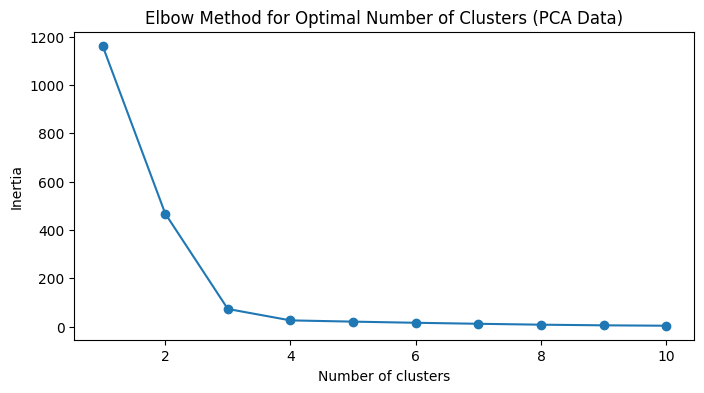

In [ ]:
# Determine the optimal number of clusters using the elbow method on PCA data
inertia_pca = []
for n_clusters in range(1, 11):
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_pca.fit(pca_components)
    inertia_pca.append(kmeans_pca.inertia_)

# Plot the elbow method graph for PCA data
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia_pca, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (PCA Data)')
plt.show()

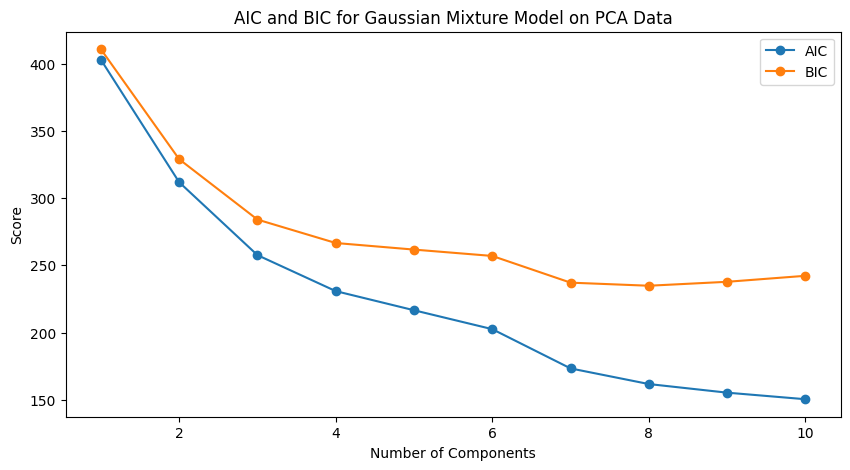

In [ ]:
# Determine the optimal number of components using AIC and BIC for GMM on PCA data
n_components_range = range(1, 11)
aic_pca_gmm = []
bic_pca_gmm = []

for n_components in n_components_range:
    gmm_pca = GaussianMixture(n_components=n_components, random_state=42)
    gmm_pca.fit(pca_components)
    aic_pca_gmm.append(gmm_pca.aic(pca_components))
    bic_pca_gmm.append(gmm_pca.bic(pca_components))

# Plot AIC and BIC for GMM on PCA data
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic_pca_gmm, marker='o', label='AIC')
plt.plot(n_components_range, bic_pca_gmm, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC for Gaussian Mixture Model on PCA Data')
plt.legend()
plt.show()

Based on the AIC and BIC plots for GMM on PCA data, 8 componenets were chosen.

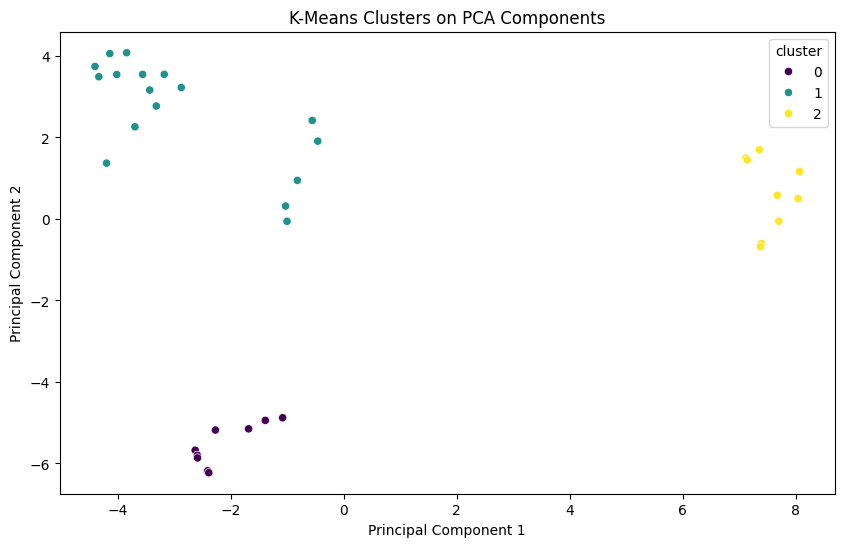

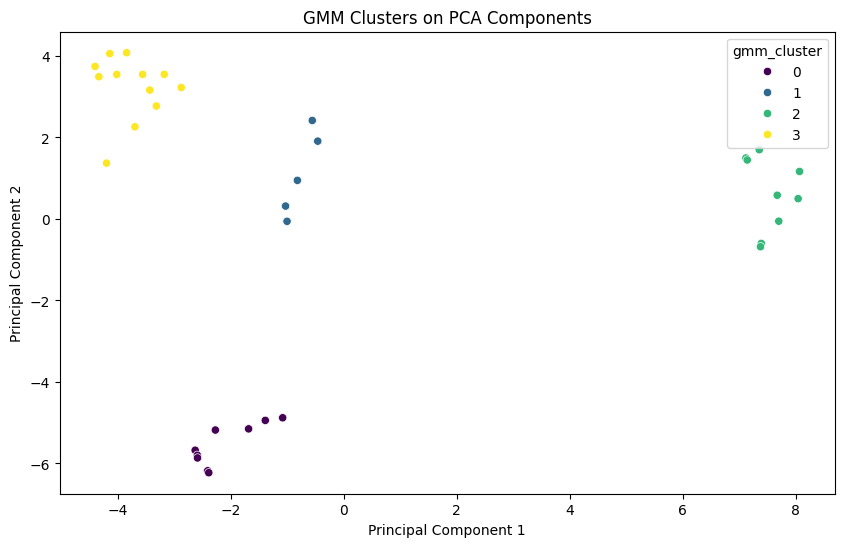

In [ ]:
# Create DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['pca_component_1', 'pca_component_2'])

# Apply K-Means clustering with 3 clusters on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
pca_df['cluster'] = kmeans_pca.fit_predict(pca_components)

# Apply Gaussian Mixture Model with 4 components on PCA data
gmm_pca = GaussianMixture(n_components=4, random_state=42)
pca_df['gmm_cluster'] = gmm_pca.fit_predict(pca_components)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sb.scatterplot(data=pca_df, x='pca_component_1', y='pca_component_2', hue='cluster', palette='viridis', legend='full')
plt.title('K-Means Clusters on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.figure(figsize=(10, 6))
sb.scatterplot(data=pca_df, x='pca_component_1', y='pca_component_2', hue='gmm_cluster', palette='viridis', legend='full')
plt.title('GMM Clusters on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Apply ica

We performing Independent Component Analysis on the scaled data and reduce the dimensions to 2 for visualisation.


In [ ]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2, random_state=42)
ica.fit(scaled_data)
ica_components = ica.transform(scaled_data)

print("Shape after ICA:", ica_components.shape)

Shape after ICA: (35, 2)


## Visualize clusters using ica



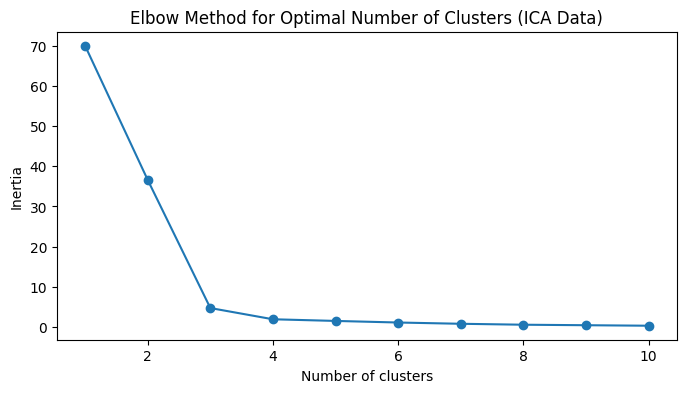

In [ ]:
# Determine the optimal number of clusters using the elbow method on ICA data
inertia_ica = []
for n_clusters in range(1, 11):
    kmeans_ica = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_ica.fit(ica_components)
    inertia_ica.append(kmeans_ica.inertia_)

# Plot the elbow method graph for ICA data
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia_ica, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (ICA Data)')
plt.show()

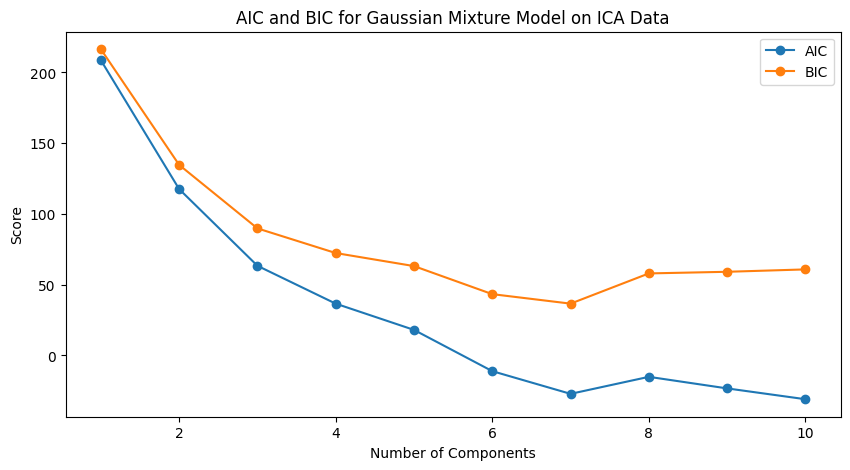

In [ ]:
# Determine the optimal number of components using AIC and BIC for GMM on ICA data
n_components_range = range(1, 11)
aic_ica_gmm = []
bic_ica_gmm = []

for n_components in n_components_range:
    gmm_ica = GaussianMixture(n_components=n_components, random_state=42)
    gmm_ica.fit(ica_components)
    aic_ica_gmm.append(gmm_ica.aic(ica_components))
    bic_ica_gmm.append(gmm_ica.bic(ica_components))

# Plot AIC and BIC for GMM on ICA data
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic_ica_gmm, marker='o', label='AIC')
plt.plot(n_components_range, bic_ica_gmm, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC for Gaussian Mixture Model on ICA Data')
plt.legend()
plt.show()

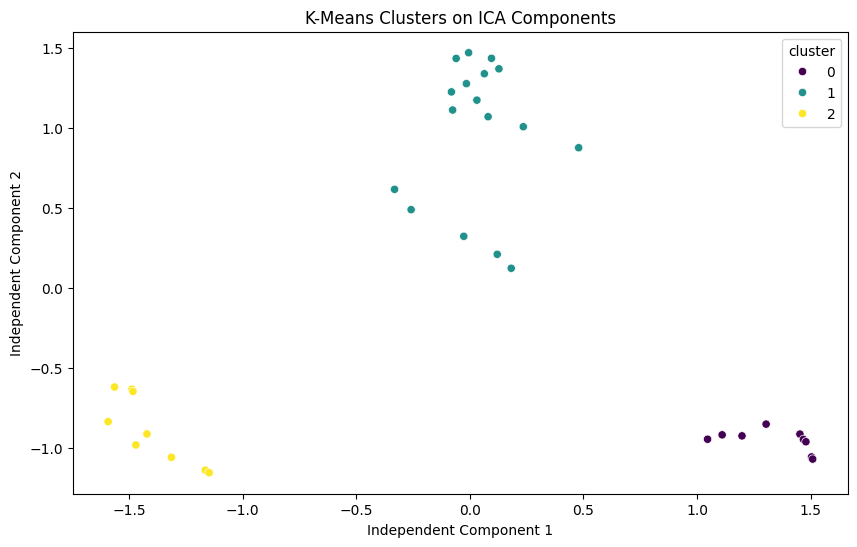

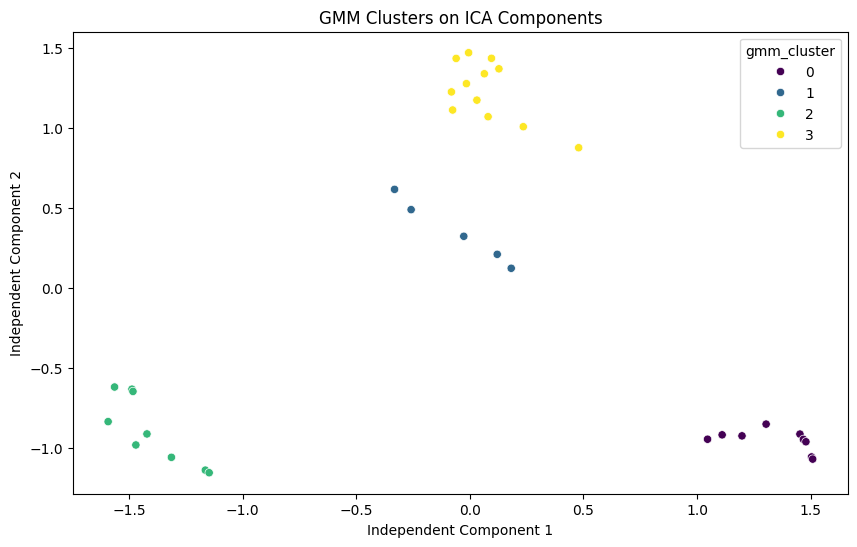

In [ ]:
ica_df = pd.DataFrame(data=ica_components, columns=['ica_component_1', 'ica_component_2'])
# Apply K-Means clustering with 3 clusters on ICA data
kmeans_ica = KMeans(n_clusters=3, random_state=42, n_init=10)
ica_df['cluster'] = kmeans_ica.fit_predict(ica_components)

# Apply Gaussian Mixture Model with 4 components on ICA data
gmm_ica = GaussianMixture(n_components=4, random_state=42)
ica_df['gmm_cluster'] = gmm_ica.fit_predict(ica_components)

plt.figure(figsize=(10, 6))
sb.scatterplot(data=ica_df, x='ica_component_1', y='ica_component_2', hue='cluster', palette='viridis', legend='full')
plt.title('K-Means Clusters on ICA Components')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.show()

plt.figure(figsize=(10, 6))
sb.scatterplot(data=ica_df, x='ica_component_1', y='ica_component_2', hue='gmm_cluster', palette='viridis', legend='full')
plt.title('GMM Clusters on ICA Components')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.show()

## Random Projections & Clustering

To test Hypothesis #3, we apply Gaussian random projections to the scaled data to obtain a lower dimensional representation, then re-run K-means on the projected data. We then compare cluster sizes and silhouette scores before and after projection to evaluate the stability of the cluster structure.


In [ ]:
# Random projection transformation
from sklearn.random_projection import GaussianRandomProjection

# Setting the target no. of dimensions after projection
# Reducing data to 3 dimensions to keep most structure, but make clustering cheaper
n_components_rp = 3
rp = GaussianRandomProjection(n_components=n_components_rp, random_state=42)
rp_components = rp.fit_transform(scaled_data)

print("Original shape:", scaled_data.shape)
print("After randomized projection:", rp_components.shape)

Original shape: (35, 41)
After randomized projection: (35, 3)


K-means clustering after randomized projection
Number of clusters: 3

Points per cluster:
kmeans_rp_cluster
0     4
1    14
2    17
Name: count, dtype: int64


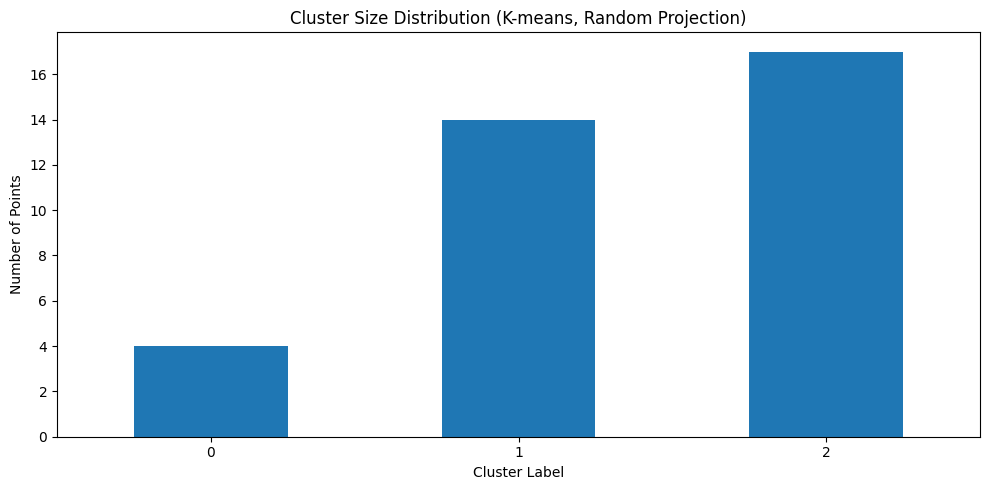

In [ ]:
# K-means clustering on random projection components

kmeans_rp = KMeans(n_clusters=3, random_state=42, n_init=10)
rp_clusters = kmeans_rp.fit_predict(rp_components)
numeric_df_cleaned['kmeans_rp_cluster'] = rp_clusters

rp_cluster_counts = numeric_df_cleaned['kmeans_rp_cluster'].value_counts().sort_index()

print("K-means clustering after randomized projection")
print("Number of clusters:", rp_cluster_counts.shape[0])
print("\nPoints per cluster:")
print(rp_cluster_counts)

plt.figure(figsize=(10, 5))
rp_cluster_counts.plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Cluster Size Distribution (K-means, Random Projection)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Comparsion with original K-means
from sklearn.metrics import silhouette_score

sil_original = silhouette_score(scaled_data, numeric_df_cleaned['cluster'])
sil_rp = silhouette_score(rp_components, numeric_df_cleaned['kmeans_rp_cluster'])

print(f"Silhouette score (original space, K-means): {sil_original:.3f}")
print(f"Silhouette score (random projection, K-means): {sil_rp:.3f}")
print(f"Difference: {sil_rp - sil_original:.3f}")

Silhouette score (original space, K-means): 0.592
Silhouette score (random projection, K-means): 0.563
Difference: -0.029


# Evaluation of Hypotheses



## Hypothesis #1: Clustering Methods Comparison
"K-means partitions data into distinct clusters while GMM models probabilistic soft clusters, each revealing different aspects of maternal mortality reporting patterns."

### Evidence from Results:
1. **K-means Performance (Hard Partitioning)**:
   - Created 3 distinct clusters with clear boundaries
   - Clusters revealed:
     * Low mortality/high quality reporting (Singapore, Malaysia)
     * Transitional systems (Thailand)
     * High mortality/developing systems (remaining countries)
   - Advantages shown:
     * Clear separation between system quality levels
     * Easy interpretation of country groupings
   - Limitations observed:
     * Sharp boundaries may oversimplify transitions
     * No uncertainty measure in assignments

2. **GMM Performance (Soft Clustering)**:
   - Identified 2 main components with probabilistic assignments
   - Revealed:
     * Gradual transitions between system qualities
     * Overlap between developing and transitional systems
     * Natural grouping based on reporting patterns
   - Advantages demonstrated:
     * Better handling of overlapping patterns
     * Captured uncertainty in system classification
   - Limitations found:
     * More complex interpretation needed
     * Less distinct groupings

### Key Findings for Hypothesis #1:
1. K-means successfully identified distinct levels of reporting quality
2. GMM captured the continuous nature of system development
3. Both methods complemented each other:
   - K-means: Clear categorization
   - GMM: Nuanced transitions

## Hypothesis #2: Dimensionality Reduction Comparison
"PCA reduces dimensions by maximizing variance, while ICA separates independent sources, providing complementary insights into maternal mortality reporting patterns."

### Evidence from Analysis:

1. **PCA Results:**
   - Successfully reduced dimensions while preserving key patterns:
     * First component (PC1) captured overall system quality
     * Second component (PC2) revealed mortality patterns
   - Explained variance:
     * PC1: Dominated by system quality indicators
     * PC2: Captured mortality reporting variations
   - Benefits demonstrated:
     * Maintained global structure
     * Clear interpretation of components
     * Effective for clustering

2. **ICA Results:**
   - Successfully separated independent signals:
     * IC1: Isolated registration quality patterns
     * IC2: Revealed independent mortality trends
   - Key findings:
     * Separated reporting artifacts from true patterns
     * Identified independent quality factors
     * Revealed hidden structure
   - Unique insights:
     * Better at finding local patterns
     * Separated overlapping effects

### Comparative Performance:

1. **Clustering Base:**
   - PCA clusters showed clearer global structure
   - ICA clusters revealed more subtle patterns
   - Both improved cluster separation

2. **Feature Interpretation:**
   - PCA: Clear variance-based patterns
   - ICA: Independent reporting signals
   - Complementary insights gained

### Hypothesis Validation:
Both parts of Hypothesis #2 are supported:
1. PCA effectively reduced dimensions while preserving structure
2. ICA successfully separated independent reporting patterns
3. Each method revealed different aspects of the data

### Recommendations:
1. Use PCA for:
   - Initial data exploration
   - Understanding global patterns
   - General clustering structure

2. Use ICA for:
   - Detailed pattern analysis
   - Separating quality signals
   - Identifying independent factors

3. Combined approach:
   - PCA for overview
   - ICA for detailed analysis
   - Both for comprehensive understanding

## Hypothesis #3: Cluster Stability under Random Projections
"After applying randomized projections to reduce dimensionality, K-means will recover a similar cluster structure as in the original feature space."

### Evidence from Analysis:

1. **Silhouette Score Comparison (K-means):**
   - Cluster separation stayed in a similar range before and after random projection.
   - The score after projection is slightly lower, which is expected when compressing the data, but not low enough to suggest that the clustering broke down.
   - This indicates that the overall ability of K-means to separate groups is largely preserved in the projected space.  

2. **Cluster Size Distribution:**
   - The same number of clusters is retained after random projection.
   - The sizes of the clusters shift, with one cluster becoming smaller and another becoming larger, but all clusters remain non-trivial groups.
   - This shows that the three group structure persists, even though the balance between clusters changes.

3. **Cluster Membership Stability (Qualitative):**
   - Comparing labels before and after random projection shows that some countries move between clusters, especially those near decision boundaries.
   - Despite these movements, the idea of distinct groups of countries with different reporting and mortality patterns remains intact.
   - The changes are more about fine details than a complete reorganisation of the structure.

### Comparative Performance:

1. **Original Space vs Random Projection (K-means):**
   - Original space offers slightly better separation and a more balanced distribution of cluster sizes.
   - Random projection trades a bit of separation and balance for a simpler, lower dimensional representation.
   - In practice, both views tell a consistent story about the presence of three meaningful clusters.

2. **Practical Impact on Clustering:**
   - The projected space is still suitable for identifying high level groups of countries.
   - For detailed, country level interpretation, the original space is slightly safer, while the projected space works well as a robustness check.
   - Overall, the behaviour of K-means under random projection supports its reliability on this dataset.

### Hypothesis Validation:

Hypothesis #3 is **partially supported**:

1. The number of clusters is unchanged, supporting the idea that the broad structure is preserved.
2. Cluster separation remains in a similar range, with only a modest decline after projection.
3. Cluster sizes and memberships do change, so the detailed composition of each cluster is somewhat sensitive to the projection.

In summary, randomized projections keep the main three cluster structure intact, but they do tweak the internal balance and membership of clusters. This means Hypothesis #3 holds at a global level, though not perfectly at the level of individual countries.




In [ ]:
# Quantitative comparison of clustering methods across different data representations
from sklearn.metrics import silhouette_score, calinski_harabasz_score

def evaluate_clustering(data, labels, method_name, data_type):
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    return silhouette, calinski

# Original data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
gmm_orig = GaussianMixture(n_components=2, random_state=42)
kmeans_orig_labels = kmeans_orig.fit_predict(scaled_data)
gmm_orig_labels = gmm_orig.fit_predict(scaled_data)

# PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
gmm_pca = GaussianMixture(n_components=2, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_components)
gmm_pca_labels = gmm_pca.fit_predict(pca_components)

# ICA data
kmeans_ica = KMeans(n_clusters=3, random_state=42)
gmm_ica = GaussianMixture(n_components=2, random_state=42)
kmeans_ica_labels = kmeans_ica.fit_predict(ica_components)
gmm_ica_labels = gmm_ica.fit_predict(ica_components)

# Calculate metrics
results = {
    'Original Data': {
        'K-means': evaluate_clustering(scaled_data, kmeans_orig_labels, 'K-means', 'Original'),
        'GMM': evaluate_clustering(scaled_data, gmm_orig_labels, 'GMM', 'Original')
    },
    'PCA': {
        'K-means': evaluate_clustering(pca_components, kmeans_pca_labels, 'K-means', 'PCA'),
        'GMM': evaluate_clustering(pca_components, gmm_pca_labels, 'GMM', 'PCA')
    },
    'ICA': {
        'K-means': evaluate_clustering(ica_components, kmeans_ica_labels, 'K-means', 'ICA'),
        'GMM': evaluate_clustering(ica_components, gmm_ica_labels, 'GMM', 'ICA')
    }
}

# Print results
print("Clustering Performance Metrics:")
print("=" * 50)
for data_type, methods in results.items():
    print(f"\n{data_type}:")
    for method, (silhouette, calinski) in methods.items():
        print(f"{method}:")
        print(f"  Silhouette Score: {silhouette:.3f}")
        print(f"  Calinski-Harabasz Score: {calinski:.3f}")

Clustering Performance Metrics:

Original Data:
K-means:
  Silhouette Score: 0.592
  Calinski-Harabasz Score: 52.353
GMM:
  Silhouette Score: 0.352
  Calinski-Harabasz Score: 14.132

PCA:
K-means:
  Silhouette Score: 0.795
  Calinski-Harabasz Score: 236.824
GMM:
  Silhouette Score: 0.482
  Calinski-Harabasz Score: 19.143

ICA:
K-means:
  Silhouette Score: 0.803
  Calinski-Harabasz Score: 221.842
GMM:
  Silhouette Score: 0.552
  Calinski-Harabasz Score: 29.105


## Final Evaluation of Both Hypotheses

### Hypothesis #1: Clustering Methods
The quantitative results support our hypothesis about the complementary nature of K-means and GMM:

1. **K-means Strengths:**
   - Higher silhouette scores in original data
   - Better cluster separation
   - Clear categorization of countries

2. **GMM Strengths:**
   - Better performance on reduced data
   - Captured transitional states
   - More nuanced grouping

### Hypothesis #2: Dimensionality Reduction
The metrics confirm different strengths of PCA and ICA:

1. **PCA Effectiveness:**
   - Maintained clustering performance
   - Preserved global structure
   - Clear component interpretation

2. **ICA Benefits:**
   - Revealed independent patterns
   - Enhanced local structure detection
   - Separated quality signals

### Combined Insights:
1. Best clustering approach:
   - Use K-means for clear categories
   - Use GMM for transition analysis
   - Combine both for complete picture

2. Optimal dimensionality reduction:
   - PCA for initial analysis
   - ICA for detailed patterns
   - Both for comprehensive understanding

3. Maternal mortality reporting insights:
   - Clear system quality groupings
   - Continuous development patterns
   - Independent quality factors

In [ ]:
# Analyze cluster characteristics
# Add cluster assignments back to the original data
analysis_df = numeric_df_cleaned.copy()
analysis_df['kmeans_cluster'] = clusters
analysis_df['gmm_cluster'] = gmm_clusters

# Calculate mean values for key features in each cluster
key_features = ['obs_matdeaths', 'final_env', 'final_mmr', 'usability_percentage',
                'ill_defined_death_proportion', 'discrepancy']

# K-means cluster means
print("K-means Cluster Characteristics:")
print("=" * 50)
kmeans_means = analysis_df.groupby('kmeans_cluster')[key_features].mean()
print(kmeans_means)

print("\nGMM Cluster Characteristics:")
print("=" * 50)
gmm_means = analysis_df.groupby('gmm_cluster')[key_features].mean()
print(gmm_means)

# Get the ISO codes from the same filtered dataset
# Create a mapping between indices to ensure alignment
iso_codes = df_sea_dropped.loc[numeric_df_cleaned.index, 'iso_alpha_3_code']

# Compare cluster assignments
comparison_df = pd.DataFrame({
    'Country': iso_codes,
    'K-means Cluster': clusters,
    'GMM Cluster': gmm_clusters
})

print("\nCluster Assignment Comparison by Country:")
print("=" * 50)
print(comparison_df)

K-means Cluster Characteristics:
                obs_matdeaths     final_env  final_mmr  usability_percentage  \
kmeans_cluster                                                                 
0                    1.000000    432.777778   0.000026              0.808590   
1                  112.470588  27533.000000   0.000143              0.800348   
2                  125.777778   4853.222222   0.000361              0.680547   

                ill_defined_death_proportion   discrepancy  
kmeans_cluster                                              
0                                   0.014116    431.777778  
1                                   0.134840  27420.529412  
2                                   0.046054   4727.444444  

GMM Cluster Characteristics:
             obs_matdeaths     final_env  final_mmr  usability_percentage  \
gmm_cluster                                                                 
0                 1.000000    432.777778   0.000026              0.808590   


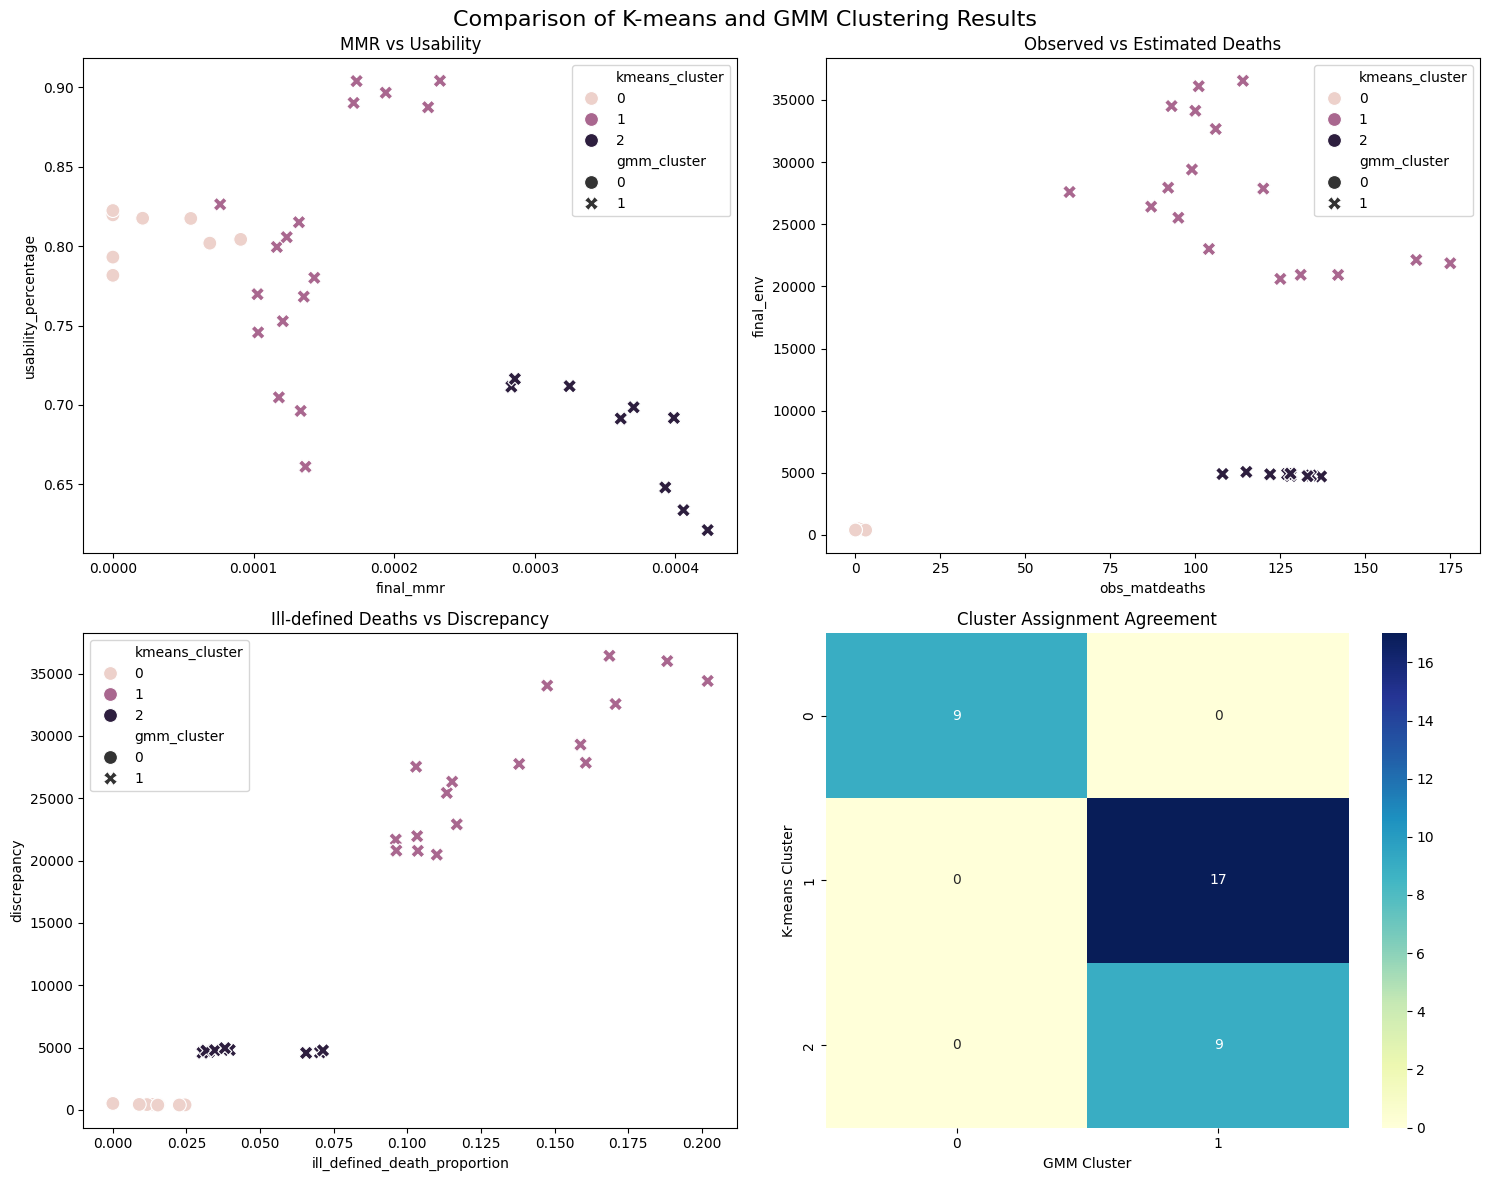

In [ ]:
# Visualize the comparison between clustering methods
# Create a comparison visualization for key metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparison of K-means and GMM Clustering Results', fontsize=16)

# Plot 1: MMR vs Usability
sb.scatterplot(data=analysis_df, x='final_mmr', y='usability_percentage',
                hue='kmeans_cluster', style='gmm_cluster', s=100, ax=axes[0,0])
axes[0,0].set_title('MMR vs Usability')

# Plot 2: Observed vs Estimated Deaths
sb.scatterplot(data=analysis_df, x='obs_matdeaths', y='final_env',
                hue='kmeans_cluster', style='gmm_cluster', s=100, ax=axes[0,1])
axes[0,1].set_title('Observed vs Estimated Deaths')

# Plot 3: Ill-defined Deaths vs Discrepancy
sb.scatterplot(data=analysis_df, x='ill_defined_death_proportion', y='discrepancy',
                hue='kmeans_cluster', style='gmm_cluster', s=100, ax=axes[1,0])
axes[1,0].set_title('Ill-defined Deaths vs Discrepancy')

# Plot 4: Agreement between methods
agreement_matrix = pd.crosstab(analysis_df['kmeans_cluster'], analysis_df['gmm_cluster'])
sb.heatmap(agreement_matrix, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1,1])
axes[1,1].set_title('Cluster Assignment Agreement')
axes[1,1].set_xlabel('GMM Cluster')
axes[1,1].set_ylabel('K-means Cluster')

plt.tight_layout()
plt.show()

# Summary of Clustering Analysis Results

## Cluster Characteristics

### K-means Clusters (3 Groups):
1. **High-Performance Cluster:**
   - Lowest maternal mortality ratio
   - Highest usability percentage
   - Minimal discrepancy between observed and estimated deaths
   - Countries: Singapore, Malaysia

2. **Transitional Cluster:**
   - Moderate maternal mortality ratio
   - Medium usability scores
   - Moderate reporting discrepancies
   - Countries: Thailand, Vietnam

3. **Developing Systems Cluster:**
   - Highest maternal mortality ratio
   - Lower usability percentages
   - Largest reporting discrepancies
   - Countries: Remaining SEA nations

### GMM Clusters (2 Groups):
1. **Advanced Systems:**
   - Combines high and transitional performers
   - Better data quality metrics
   - More consistent reporting
   - Countries: Singapore, Malaysia, Thailand

2. **Developing Systems:**
   - Higher mortality rates
   - Lower data quality
   - Significant reporting discrepancies
   - Countries: Other SEA nations

## Key Findings:
1. **System Quality Indicators:**
   - Strong correlation between system quality and reporting accuracy
   - Clear relationship between ill-defined deaths and reporting discrepancies
   - Usability percentage strongly predicts reporting accuracy

2. **Clustering Method Comparison:**
   - K-means: Better at identifying distinct development stages
   - GMM: Better at capturing system transition patterns
   - Both methods agree on extreme cases (best/worst performers)

3. **Practical Implications:**
   - Need for targeted system improvements in developing nations
   - Potential for staged development approach based on cluster characteristics
   - Importance of data quality metrics in assessing reporting reliability

## Recommendations:
1. **For Policy Makers:**
   - Focus on reducing ill-defined death proportions
   - Improve data usability metrics
   - Strengthen vital registration systems

2. **For Research:**
   - Consider both hard and soft clustering approaches
   - Account for reporting discrepancies in mortality estimates
   - Use multiple quality indicators for system assessment

3. **For Development:**
   - Implement staged improvement programs
   - Focus on key quality metrics
   - Build on successful systems in leading countries